In [92]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn as sns


In [93]:
connection = sqlite3.connect('database.sqlite')
query_Country = "SELECT * FROM Country"
query_League = "SELECT * FROM League"
query_Match = "SELECT * FROM Match"
query_Player = "SELECT * FROM Player"
query_Player_Attributes = "SELECT * FROM Player_Attributes"
query_Team = "SELECT * FROM Team"
query_Team_Attributes = "SELECT * FROM Team_Attributes"
query_sqlite_sequence = "SELECT * FROM sqlite_sequence"



Identifier les attributs les plus intéressants à analyser :

Pour les joueurs : Taille, poids, potentiel, note globale, pied préféré.

Pour les équipes : Style de jeu, efficacité défensive, pression.

Pour les matchs : Scores, possession, et autres métriques de performance.

​

In [94]:
df_country = pd.read_sql(query_Country, connection)
df_league = pd.read_sql(query_League, connection)
df_compitition = pd.merge(df_country, df_league, on='id', how='inner')


In [95]:
df_compitition

,id,name_x,country_id,name_y
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A
5,13274,Netherlands,13274,Netherlands Eredivisie
6,15722,Poland,15722,Poland Ekstraklasa
7,17642,Portugal,17642,Portugal Liga ZON Sagres
8,19694,Scotland,19694,Scotland Premier League
9,21518,Spain,21518,Spain LIGA BBVA


In [96]:
df_player = pd.read_sql(query_Player, connection)
df_player['birthday'] = pd.to_datetime(df_player['birthday'], errors='coerce')
df_player['birthday'] = df_player['birthday'].dt.date


In [97]:
df_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06,185.42,172


In [98]:
df_player_att = pd.read_sql(query_Player_Attributes, connection)
df_player_att['date'] = pd.to_datetime(df_player_att['date'])
df_player_att['date'] = df_player_att['date'].dt.date


In [99]:

# Relier les joueurs aux matchs
df_player_combined = pd.merge(df_player, df_player_att, on='player_api_id', how='inner')
df_player_combined

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,1,218353,2016-02-18,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2,218353,2015-11-19,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,3,218353,2015-09-21,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,4,218353,2015-03-20,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,5,218353,2007-02-22,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,183974,102359,2009-08-30,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,183975,102359,2009-02-22,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,183976,102359,2008-08-30,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,183977,102359,2007-08-30,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [100]:

# Filtrer les colonnes pertinentes
columns_of_interest = ['player_name', 'height', 'weight', 'potential', 'overall_rating', 'preferred_foot']
df_filtered = df_player_combined[columns_of_interest]

# Fonction pour afficher un graphique pour un joueur
def plot_player_stats(player_name):
    # Filtrer les données du joueur
    player_data = df_filtered[df_filtered['player_name'] == player_name].iloc[0]
    
    # Créer les labels et les valeurs
    labels = ['Height (cm)', 'Weight (kg)', 'Potential', 'Overall Rating']
    values = [
        player_data['height'],
        player_data['weight'],
        player_data['potential'],
        player_data['overall_rating']
    ]
    
    # Créer le bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
    plt.title(f"Stats for {player_name} (Preferred Foot: {player_data['preferred_foot']})", fontsize=14)
    plt.ylabel("Value")
    plt.show()

# Liste des noms de joueurs uniques
player_names = df_filtered['player_name'].unique()

# Widget interactif
interact(plot_player_stats, player_name=player_names)


interactive(children=(Dropdown(description='player_name', options=('Aaron Appindangoye', 'Aaron Cresswell', 'A…

<function __main__.plot_player_stats(player_name)>

In [101]:
df_player_combined['date']=pd.to_datetime(df_player_combined['date'] , errors='coerce')
# df_player_combined['date']=df_player_combined['date'].dt.year

In [102]:
# Ensure the 'date' column is in datetime format
df_player_combined['date'] = pd.to_datetime(df_player_combined['date'])

# Create the 'season' column
def calculate_season(date):
    year = date.year
    if date.month >= 7:
        return f"{year}-{year+1}"
    else:
        return f"{year-1}-{year}"

df_player_combined['season'] = df_player_combined['date'].apply(calculate_season)

df_player_combined
# print(df_player_combined[['potential', 'player_name', 'season']])


,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,season
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,1,218353,2016-02-18,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015-2016
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2,218353,2015-11-19,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015-2016
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,3,218353,2015-09-21,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015-2016
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,4,218353,2015-03-20,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2014-2015
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,5,218353,2007-02-22,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,183974,102359,2009-08-30,...,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,2009-2010
183974,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,183975,102359,2009-02-22,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,2008-2009
183975,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,183976,102359,2008-08-30,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,2008-2009
183976,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,183977,102359,2007-08-30,...,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,2007-2008


In [103]:
# Group by 'season' and find the maximum potential for each season
max_potential_per_season = df_player_combined.groupby('season')['potential'].max().reset_index()

# Merge the max potential back with the original dataframe to get player details
most_performant_players = pd.merge(max_potential_per_season, df_player_combined, on=['season', 'potential'], how='inner')

# Select relevant columns for analysis
result = most_performant_players[['season', 'player_name', 'potential']].drop_duplicates()

# Sort by season
result = result.sort_values(by='season')

# Display the result
result


,season,player_name,potential
0,2006-2007,Ronaldinho,95.0
1,2007-2008,Cristiano Ronaldo,94.0
2,2008-2009,Lionel Messi,95.0
4,2009-2010,Lionel Messi,95.0
5,2010-2011,Lionel Messi,95.0
6,2011-2012,Lionel Messi,96.0
8,2012-2013,Lionel Messi,97.0
11,2013-2014,Lionel Messi,97.0
14,2014-2015,Lionel Messi,95.0
19,2015-2016,Lionel Messi,95.0


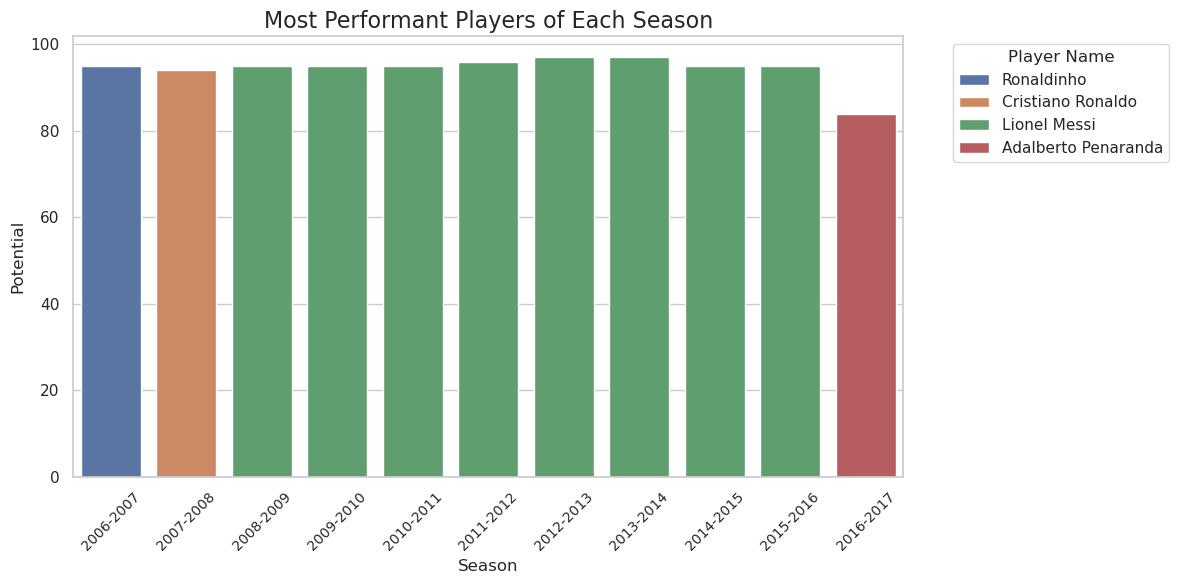

In [104]:
# Prepare the data
result = most_performant_players[['season', 'player_name', 'potential']].drop_duplicates()

# Set the plot style
plt.figure(figsize=(12, 6))
sns.barplot(
    data=result,
    x='season',
    y='potential',
    hue='player_name',  # Different colors for different players
    dodge=False
)

# Customize the plot
plt.title('Most Performant Players of Each Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Potential', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Player Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

Étape 1 : Identifier les attributs clés
Les attributs principaux pour évaluer la performance peuvent inclure :

Performance générale : overall_rating, potential.

Compétences techniques : short_passing, dribbling, ball_control, finishing.

Compétences physiques : acceleration, sprint_speed, stamina, strength.

Capacités défensives : marking, standing_tackle, sliding_tackle.

Capacités mentales : vision, positioning, reactions.

Étape 2 : Calculer une métrique pondérée

Attribuez des poids à chaque catégorie selon leur importance. Par exemple :

\text{Performance} = (0.4 \times \text{overall_rating}) + (0.3 \times \text{potential}) + (0.1 \times \text{physique}) + (0.1 \times \text{technique}) + (0.1 \times \text{mental})

Les sous-catégories peuvent être moyennées ou pondérées dans chaque groupe.

In [105]:

# Calcul des groupes de compétences
df_player_combined['physique'] = df_player_combined[['acceleration', 'sprint_speed', 'stamina', 'strength']].mean(axis=1)
df_player_combined['technique'] = df_player_combined[['short_passing', 'dribbling', 'ball_control', 'finishing']].mean(axis=1)
df_player_combined['mental'] = df_player_combined[['vision', 'positioning', 'reactions']].mean(axis=1)
df_player_combined['defense'] = df_player_combined[['marking', 'standing_tackle', 'sliding_tackle']].mean(axis=1)

# Calcul de la métrique globale
df_player_combined['performance_score'] = (
    0.4 * df_player_combined['overall_rating'] +
    0.3 * df_player_combined['potential'] +
    0.1 * df_player_combined['physique'] +
    0.1 * df_player_combined['technique'] +
    0.1 * df_player_combined['mental']
)

# Vérifiez les joueurs les plus performants par saison
most_performant = df_player_combined.groupby('season').apply(lambda x: x.nlargest(1, 'performance_score'))
most_performant


,,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,season,physique,technique,mental,defense,performance_score
season,,,,,,,,,,,,,,,,,,,,,,
2006-2007,178975,10749,30829,Wayne Rooney,54050,1985-10-24,175.26,183,178976,54050,2007-02-22,...,7.0,71.0,11.0,12.0,2006-2007,91.00,89.00,86.666667,37.000000,91.766667
2007-2008,153452,9216,30743,Ronaldinho,28130,1980-03-21,182.88,168,153453,28130,2007-08-30,...,22.0,85.0,22.0,22.0,2007-2008,84.00,93.50,90.000000,23.000000,91.050000
2008-2009,102505,6176,30981,Lionel Messi,158023,1987-06-24,170.18,159,102506,158023,2008-08-30,...,20.0,79.0,20.0,20.0,2008-2009,83.00,92.25,87.666667,21.666667,90.791667
2009-2010,102503,6176,30981,Lionel Messi,158023,1987-06-24,170.18,159,102504,158023,2009-08-30,...,20.0,75.0,20.0,20.0,2009-2010,81.50,93.00,87.666667,20.333333,90.716667
2010-2011,102501,6176,30981,Lionel Messi,158023,1987-06-24,170.18,159,102502,158023,2010-08-30,...,11.0,15.0,14.0,8.0,2010-2011,79.00,93.25,90.000000,18.000000,90.725000
2011-2012,102499,6176,30981,Lionel Messi,158023,1987-06-24,170.18,159,102500,158023,2011-08-30,...,11.0,15.0,14.0,8.0,2011-2012,79.50,93.75,92.333333,18.000000,92.958333
2012-2013,102494,6176,30981,Lionel Messi,158023,1987-06-24,170.18,159,102495,158023,2013-03-22,...,11.0,15.0,14.0,8.0,2012-2013,82.75,94.75,93.000000,18.000000,93.750000
2013-2014,102491,6176,30981,Lionel Messi,158023,1987-06-24,170.18,159,102492,158023,2014-04-25,...,11.0,15.0,14.0,8.0,2013-2014,80.50,94.75,93.000000,22.000000,93.525000
2014-2015,102486,6176,30981,Lionel Messi,158023,1987-06-24,170.18,159,102487,158023,2015-03-13,...,11.0,15.0,14.0,8.0,2014-2015,80.75,93.75,92.000000,22.000000,92.350000


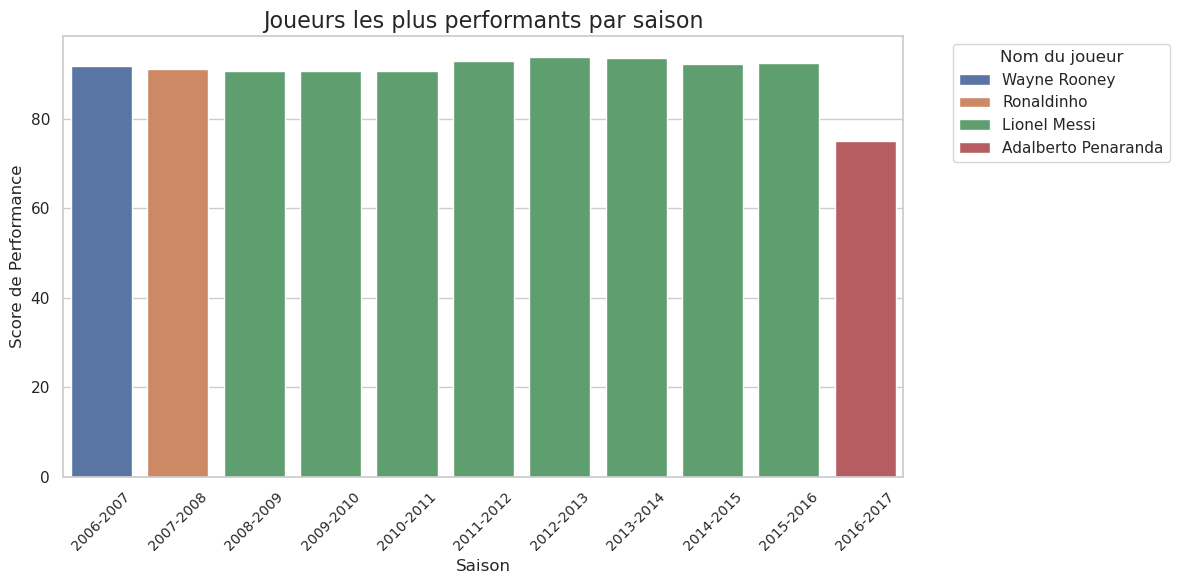

In [106]:

# Préparer les données
result = most_performant[['season', 'player_name', 'performance_score']].reset_index(drop=True)

# Tracer le graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=result, x='season', y='performance_score', hue='player_name', dodge=False)

# Personnalisation
plt.title('Joueurs les plus performants par saison', fontsize=16)
plt.xlabel('Saison', fontsize=12)
plt.ylabel('Score de Performance', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Nom du joueur', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


Handle Missing Values for df_player_combined:


In [107]:
# List of numerical columns with missing values
columns_with_missing = ['agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
                        'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 
                        'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
                        'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
                        'physique', 'technique', 'mental', 'defense', 'performance_score']

# Loop through each column and fill missing values with the median of that column
for column in columns_with_missing:
    df_player_combined[column].fillna(df_player_combined[column].median(), inplace=True)


# Fill missing numerical values with the median for other columns
numerical_columns = ['overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy', 
                     'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 
                     'long_passing', 'ball_control', 'acceleration', 'sprint_speed']

# Loop through each numerical column and fill missing values with the median of that column
for column in numerical_columns:
    df_player_combined[column].fillna(df_player_combined[column].median(), inplace=True)

# Fill missing categorical values with the mode (most frequent value)
categorical_columns = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

# Loop through each categorical column and fill missing values with the mode
for column in categorical_columns:
    df_player_combined[column].fillna(df_player_combined[column].mode()[0], inplace=True)


In [108]:
# Count the number of missing values per column
missing_values = df_player_combined.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values
print("data cleaned \n", missing_values)


data cleaned 
 Series([], dtype: int64)


In [109]:
df_player_combined.columns

Index(['id_x', 'player_api_id', 'player_name', 'player_fifa_api_id_x',
       'birthday', 'height', 'weight', 'id_y', 'player_fifa_api_id_y', 'date',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'season', 'physique', 'technique', 'mental', 'defense',
       'performance_score'],
      dtype='object')

In [110]:
# Ensure 'date' is in datetime format
df_player_combined['date'] = pd.to_datetime(df_player_combined['date'])

# Group by player and date, calculate the mean overall rating
df_overall_rating_per_day = df_player_combined.groupby(['player_name', 'date'])['overall_rating'].mean().reset_index()

# Rename columns for clarity
df_overall_rating_per_day.rename(columns={'overall_rating': 'overall_rating_per_day'}, inplace=True)

# Sort the results by player and date
df_overall_rating_per_day = df_overall_rating_per_day.sort_values(by=['player_name', 'date'])

# Display the results
print(df_overall_rating_per_day.head())


          player_name       date  overall_rating_per_day
0  Aaron Appindangoye 2007-02-22                    61.0
1  Aaron Appindangoye 2015-03-20                    61.0
2  Aaron Appindangoye 2015-09-21                    62.0
3  Aaron Appindangoye 2015-11-19                    67.0
4  Aaron Appindangoye 2016-02-18                    67.0


In [111]:
df_player_combined[['overall_rating'  , 'date' , 'player_name']]

,overall_rating,date,player_name
0,67.0,2016-02-18,Aaron Appindangoye
1,67.0,2015-11-19,Aaron Appindangoye
2,62.0,2015-09-21,Aaron Appindangoye
3,61.0,2015-03-20,Aaron Appindangoye
4,61.0,2007-02-22,Aaron Appindangoye
...,...,...,...
183973,83.0,2009-08-30,Zvjezdan Misimovic
183974,78.0,2009-02-22,Zvjezdan Misimovic
183975,77.0,2008-08-30,Zvjezdan Misimovic
183976,78.0,2007-08-30,Zvjezdan Misimovic


In [112]:
### grouping overall_rating by player and date 
overall_rating_per_s = df_player_combined.groupby(['player_name' , df_player_combined['date'].dt.year])['overall_rating'].mean().reset_index()
overall_rating_per_s = overall_rating_per_s.sort_values(by=['overall_rating' , 'date'] , ascending=[False , True])
overall_rating_per_s

,player_name,date,overall_rating
40182,Lionel Messi,2012,94.000000
40183,Lionel Messi,2013,94.000000
40185,Lionel Messi,2015,93.428571
40184,Lionel Messi,2014,93.333333
13027,Cristiano Ronaldo,2015,92.600000
...,...,...,...
51416,Nick Blackman,2007,36.000000
29928,James Vincent,2007,35.000000
51646,Nicola Madonna,2007,35.000000
29929,James Vincent,2008,35.000000


In [113]:
### top player by overrating
top_rating_player=overall_rating_per_s.sort_values(by='overall_rating'  , ascending=False).drop_duplicates(subset='player_name').head(10)

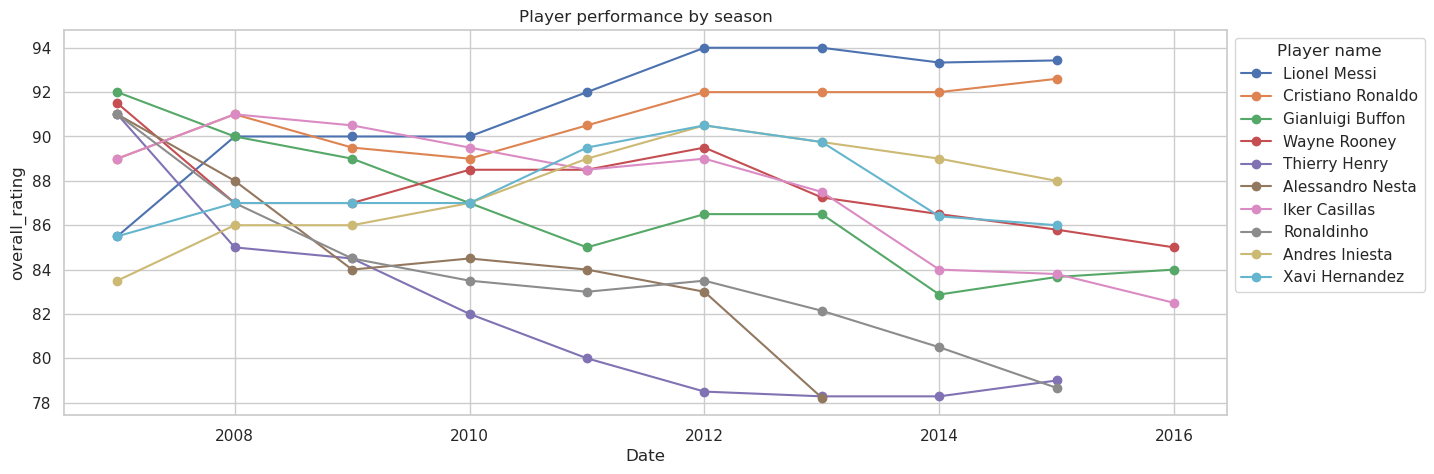

In [114]:
#### visualisation of players by overtaing of each season
plt.figure(figsize=(15,5))

for player in top_rating_player['player_name']:
    player_data=overall_rating_per_s[overall_rating_per_s['player_name']==player].sort_values(by='date' , ascending = True)
    plt.plot(player_data['date'] , player_data['overall_rating'] , label=player , marker='o')

plt.title('Player performance by season')
plt.xlabel('Date')
plt.ylabel('overall_rating')
plt.legend(title='Player name' , bbox_to_anchor=(1,1))
plt.show()

/tmp/ipykernel_835447/2122543429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='player_name', y='std_dev', data=top_player_con, palette='viridis')


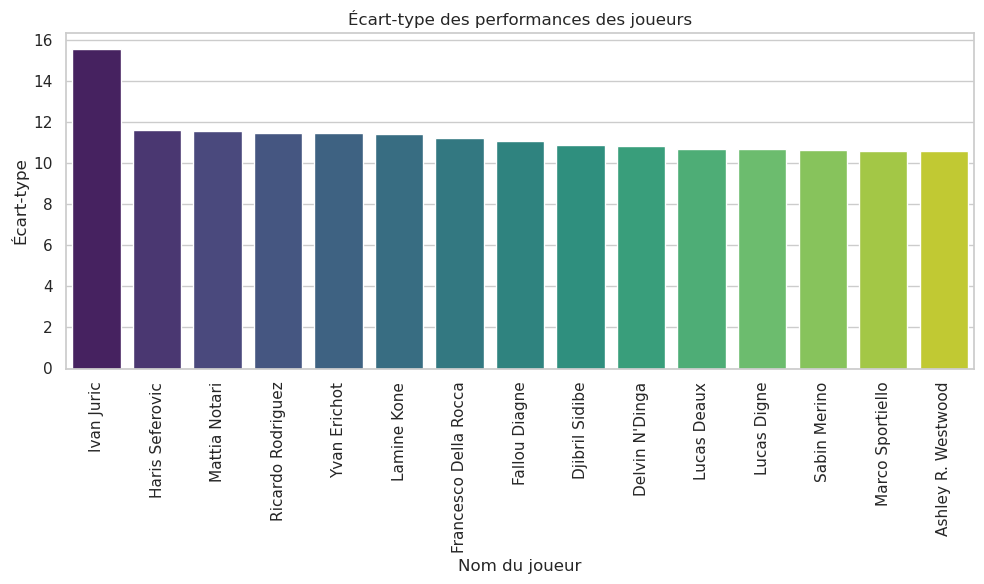

In [115]:
player_cons=df_overall_rating_per_day.groupby('player_name')['overall_rating_per_day'].agg(['std' , 'mean' , 'count']).reset_index()
player_cons.rename(columns={'std' : 'std_dev' , 'mean' : 'avg_rating' , 'count' : 'match_played'} , inplace=True)
player_cons=player_cons.sort_values(by='std_dev' , ascending=False)
top_player_con=player_cons.head(15)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='player_name', y='std_dev', data=top_player_con, palette='viridis')


plt.xticks(rotation=90)

plt.title('Écart-type des performances des joueurs')
plt.xlabel('Nom du joueur')
plt.ylabel('Écart-type')

plt.tight_layout()

plt.show()

Analyse des Équipes :

Quelles équipes dominent dans chaque ligue ?

Analysez les victoires, défaites, et matchs nuls pour identifier les équipes les plus efficaces.

Comparez les équipes en termes de styles de jeu : vitesse de construction, précision des passes, et pression défensive.

​

In [116]:
df_team = pd.read_sql(query_Team, connection)
df_team_att = pd.read_sql(query_Team_Attributes, connection)
df_team_combined = pd.merge(df_team, df_team_att, on='team_api_id', how='inner')

df_team_combined['date']=pd.to_datetime(df_team_combined['date'] , errors='coerce')
# df_player_combined['date']=df_player_combined['date'].dt.year


In [117]:
# Calculate a composite performance score for each team
performance_metrics = [
    'buildUpPlaySpeed', 'buildUpPlayPassing', 
    'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 
    'defencePressure', 'defenceAggression', 'defenceTeamWidth'
]

# Calculate total scores for each team
df_team_combined['performance_score'] = df_team_combined[performance_metrics].sum(axis=1)

# Group by team and calculate their average performance
team_performance = df_team_combined.groupby(['team_api_id', 'team_long_name'])['performance_score'].mean().reset_index()

# Sort by performance score
team_performance = team_performance.sort_values(by='performance_score', ascending=False)
print(team_performance.head(10))


     team_api_id          team_long_name  performance_score
125         8596                 Falkirk         540.000000
201         9860     Heart of Midlothian         479.600000
172         9789       Borussia Dortmund         469.333333
225         9925                  Celtic         465.833333
79          8429  Hamilton Academical FC         461.333333
234         9985       Standard de Liège         460.333333
198         9855        Grenoble Foot 38         460.000000
47          8191                 Burnley         459.666667
244         9999           KSV Roeselare         455.000000
156         8697        SV Werder Bremen         453.833333


In [118]:
df_player_combined

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,season,physique,technique,mental,defense,performance_score
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,1,218353,2016-02-18,...,11.0,10.0,8.0,8.0,2015-2016,63.50,51.25,48.666667,67.666667,64.441667
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2,218353,2015-11-19,...,11.0,10.0,8.0,8.0,2015-2016,63.50,51.25,48.666667,67.666667,64.441667
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,3,218353,2015-09-21,...,11.0,10.0,8.0,8.0,2015-2016,63.50,51.25,48.666667,66.666667,60.941667
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,4,218353,2015-03-20,...,10.0,9.0,7.0,7.0,2014-2015,63.50,50.25,47.666667,63.666667,60.041667
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,5,218353,2007-02-22,...,10.0,9.0,7.0,7.0,2006-2007,63.50,50.25,47.666667,63.666667,60.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,183974,102359,2009-08-30,...,20.0,84.0,20.0,20.0,2009-2010,69.25,83.75,86.666667,27.666667,82.666667
183974,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,183975,102359,2009-02-22,...,20.0,73.0,20.0,20.0,2008-2009,66.00,82.75,78.000000,31.000000,77.875000
183975,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,183976,102359,2008-08-30,...,20.0,73.0,20.0,20.0,2008-2009,66.00,81.50,78.000000,31.000000,77.350000
183976,11075,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,183977,102359,2007-08-30,...,20.0,73.0,20.0,20.0,2007-2008,61.75,82.00,75.000000,30.000000,77.375000


In [119]:
# Assuming 'league_name' column is available after merging
# Group by league and find the team with the highest performance score
dominant_teams = df_team_combined.groupby('team_api_id').apply(
    lambda x: x.loc[x['performance_score'].idxmax(), ['team_long_name', 'performance_score']]).reset_index()

# Rename columns for clarity
dominant_teams.rename(columns={'team_long_name': 'Dominant Team', 'performance_score': 'Score'}, inplace=True)

print(dominant_teams.head())


   team_api_id          Dominant Team  Score
0         1601           Ruch Chorzów    429
1         1773    Oud-Heverlee Leuven    396
2         1957  Jagiellonia Białystok    440
3         2033         S.C. Olhanense    415
4         2182            Lech Poznań    463


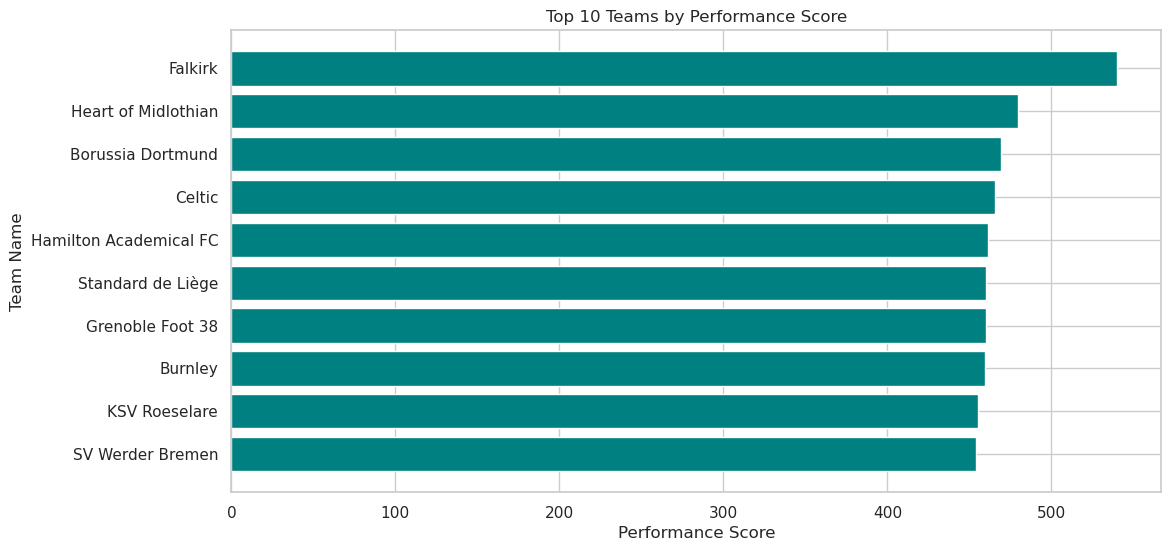

In [120]:

# Plot performance scores for the top teams
plt.figure(figsize=(12, 6))
plt.barh(team_performance['team_long_name'][:10], team_performance['performance_score'][:10], color='teal')
plt.xlabel('Performance Score')
plt.ylabel('Team Name')
plt.title('Top 10 Teams by Performance Score')
plt.gca().invert_yaxis()
plt.show()


In [121]:
df_merged = pd.merge(
    df_team_combined, 
    df_compitition, 
    left_on='team_api_id',  # Or another correct key
    right_on='id', 
    how='left'
)
df_merged

,id_x,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,performance_score,id,name_x,country_id,name_y
0,1,9987,673.0,KRC Genk,GEN,485,673,2010-02-22,45,Balanced,...,65,Press,70,Wide,Cover,440,NaN,NaN,NaN,NaN
1,1,9987,673.0,KRC Genk,GEN,486,673,2011-02-22,66,Balanced,...,47,Press,54,Normal,Offside Trap,449,NaN,NaN,NaN,NaN
2,1,9987,673.0,KRC Genk,GEN,487,673,2012-02-22,53,Balanced,...,45,Press,55,Normal,Cover,414,NaN,NaN,NaN,NaN
3,1,9987,673.0,KRC Genk,GEN,488,673,2013-09-20,58,Balanced,...,45,Press,55,Normal,Cover,414,NaN,NaN,NaN,NaN
4,1,9987,673.0,KRC Genk,GEN,489,673,2014-09-19,58,Balanced,...,45,Press,55,Normal,Cover,414,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,50201,9777,324.0,Servette FC,SER,1156,324,2013-09-20,48,Balanced,...,45,Press,49,Normal,Cover,406,NaN,NaN,NaN,NaN
1454,50204,7730,1862.0,FC Lausanne-Sports,LAU,672,1862,2010-02-22,30,Slow,...,60,Press,50,Normal,Cover,415,NaN,NaN,NaN,NaN
1455,50204,7730,1862.0,FC Lausanne-Sports,LAU,673,1862,2012-02-22,37,Balanced,...,43,Press,55,Normal,Cover,387,NaN,NaN,NaN,NaN
1456,50204,7730,1862.0,FC Lausanne-Sports,LAU,674,1862,2013-09-20,51,Balanced,...,43,Press,55,Normal,Cover,401,NaN,NaN,NaN,NaN


In [122]:
# Merge league information into df_team_combined
df_merged = pd.merge(
    df_team_combined, 
    df_compitition, 
    left_on='team_api_id',  # Adjust if needed
    right_on='id',          # Adjust column name for linking key
    how='left'
)

# Check the columns to verify the merge
print(df_merged.columns)

# Calculate performance score
performance_metrics = [
    'buildUpPlaySpeed', 'buildUpPlayPassing', 
    'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 
    'defencePressure', 'defenceAggression', 'defenceTeamWidth'
]
df_merged['performance_score'] = df_merged[performance_metrics].sum(axis=1)

# Group by league and team to calculate their average performance
league_team_performance = df_merged.groupby(['name_y', 'team_api_id', 'team_long_name'])['performance_score'].mean().reset_index()

# Sort by league and performance score in descending order
league_team_performance = league_team_performance.sort_values(['name_y', 'performance_score'], ascending=[True, False])

# Select the top 10 teams for each league
top_10_per_league = league_team_performance.groupby('name_y').head(10).reset_index(drop=True)

# Display the result
print(top_10_per_league)



Index(['id_x', 'team_api_id', 'team_fifa_api_id_x', 'team_long_name',
       'team_short_name', 'id_y', 'team_fifa_api_id_y', 'date',
       'buildUpPlaySpeed', 'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass',
       'performance_score', 'id', 'name_x', 'country_id', 'name_y'],
      dtype='object')
Empty DataFrame
Columns: [name_y, team_api_id, team_long_name, performance_score]
Index: []


In [123]:
# Calculate a composite performance score for each team
performance_metrics = [
    'buildUpPlaySpeed', 'buildUpPlayPassing', 
    'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 
    'defencePressure', 'defenceAggression', 'defenceTeamWidth'
]

# Calculate total scores for each team
df_team_combined['performance_score'] = df_team_combined[performance_metrics].sum(axis=1)

# Assuming `league_name` column exists (merged from df_competition)
# Group by league and team to calculate their average performance
league_team_performance = df_team_combined.groupby(['team_api_id', 'team_long_name'])['performance_score'].mean().reset_index()

# Sort by league and performance score in descending order
league_team_performance = league_team_performance.sort_values(['team_api_id', 'performance_score'], ascending=[True, False])

# Select the top 10 teams for each league
top_10_per_league = league_team_performance.groupby('team_api_id').head(10).reset_index(drop=True)

# Display the result
print(top_10_per_league)


     team_api_id         team_long_name  performance_score
0           1601           Ruch Chorzów         406.666667
1           1773    Oud-Heverlee Leuven         396.000000
2           1957  Jagiellonia Białystok         413.333333
3           2033         S.C. Olhanense         363.000000
4           2182            Lech Poznań         446.000000
..           ...                    ...                ...
283        10281        Real Valladolid         415.666667
284       108893       AC Arles-Avignon         350.833333
285       158085              FC Arouca         377.000000
286       208931                  Carpi         380.500000
287       274581   Royal Excel Mouscron         390.000000

[288 rows x 3 columns]


In [124]:
# df_team['team_long_name']
league_team_performance

,team_api_id,team_long_name,performance_score
0,1601,Ruch Chorzów,406.666667
1,1773,Oud-Heverlee Leuven,396.000000
2,1957,Jagiellonia Białystok,413.333333
3,2033,S.C. Olhanense,363.000000
4,2182,Lech Poznań,446.000000
...,...,...,...
283,10281,Real Valladolid,415.666667
284,108893,AC Arles-Avignon,350.833333
285,158085,FC Arouca,377.000000
286,208931,Carpi,380.500000


In [125]:

# # Step 1: Merge league_team_performance with df_team on 'team_api_id' for team names
# performance_with_teams = pd.merge(
#     league_team_performance, df_team_combined, on="team_api_id", how="inner"
# )

# # Step 2: Merge the resulting DataFrame with df_competition for league names
# performance_with_leagues = pd.merge(
#     performance_with_teams, df_compitition, left_on="team_long_name_x", right_on="name_y", how="inner"
# )

# # Step 3: Filter top 10 teams per league based on performance_score
# top_10_per_league = (
#     performance_with_leagues.groupby("name_y", group_keys=False)
#     .apply(lambda x: x.nlargest(10, "performance_score"))
#     .reset_index(drop=True)
# )
# top_10_per_league
# # Step 4: Plot the results
# for league_name in top_10_per_league['name_y'].unique():
#     league_data = top_10_per_league[top_10_per_league['name_y'] == league_name]
#     plt.figure(figsize=(10, 6))
#     plt.barh(
#         league_data['team_long_name_x'], 
#         league_data['performance_score'], 
#         color='skyblue'
#     )
#     plt.xlabel('Performance Score')
#     plt.ylabel('Team Name')
#     plt.title(f'Top 10 Teams in {league_name}')
#     plt.gca().invert_yaxis()  # Invert y-axis for better readability
#     plt.show()

In [126]:
player_name = df_player[['player_api_id','player_name']]
Team_name = df_team[['team_api_id','team_long_name']]
League_name = df_league[['country_id','name']]

In [127]:
df_match = pd.read_sql(query_Match, connection)
df_match['away_team_goal']


0        1
1        0
2        3
3        0
4        3
        ..
25974    0
25975    2
25976    0
25977    0
25978    3
Name: away_team_goal, Length: 25979, dtype: int64

In [128]:
df_match = pd.read_sql(query_Match, connection)

match_columns = df_match[['league_id','stage','season','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']]
analys_team = pd.merge(match_columns, Team_name, left_on='home_team_api_id', right_on='team_api_id', how='inner')
analys_team.drop(columns=['team_api_id', 'home_team_api_id'], inplace=True)

analys_team = analys_team.rename(columns={'team_long_name': 'home_team'})
analys_team = pd.merge(analys_team, Team_name, left_on='away_team_api_id', right_on='team_api_id', how='inner')
analys_team.drop(columns=['team_api_id', 'away_team_api_id'], inplace=True)
analys_team = analys_team.rename(columns={'team_long_name': 'away_team'})

analys_team = pd.merge(analys_team, League_name, left_on='league_id', right_on='country_id', how='inner')
analys_team.drop(columns=['league_id'], inplace=True)
analys_team = analys_team.rename(columns={'name': 'league_id'})

In [129]:
analys_team['result'] = analys_team.apply(lambda row: 'home' if row['home_team_goal'] > row['away_team_goal'] 
                        else ('away' if row['away_team_goal'] > row['home_team_goal'] 
                              else 'draw'), axis=1)

analys_team[analys_team['result']== 'draw'].count()

stage             6596
season            6596
home_team_goal    6596
away_team_goal    6596
home_team         6596
away_team         6596
country_id        6596
league_id         6596
result            6596
dtype: int64

In [130]:

home_results = analys_team.groupby(['league_id', 'home_team'])['result'].value_counts().unstack(fill_value=0)
# away_results = df.groupby(['league_id', 'away_team'])['away_result'].value_counts().unstack(fill_value=0)

In [131]:
home_results


result                                            away  draw  home
league_id                home_team                                
Belgium Jupiler League   Beerschot AC               21    25    30
                         Club Brugge KV             13    18    75
                         FCV Dender EH               8     4     5
                         KAA Gent                   27    19    63
                         KAS Eupen                   9     3     3
...                                                ...   ...   ...
Switzerland Super League FC Zürich                  43    38    62
                         Grasshopper Club Zürich    42    30    71
                         Lugano                      8     4     6
                         Neuchâtel Xamax            24    17    22
                         Servette FC                17     7    11

[296 rows x 3 columns]

In [132]:
# Reset index to prepare for plotting
home_results_reset = home_results.reset_index()

# Melt the DataFrame for easier visualization
home_results_melted = home_results_reset.melt(
    id_vars=['league_id', 'home_team'], 
    var_name='result', 
    value_name='count'
)


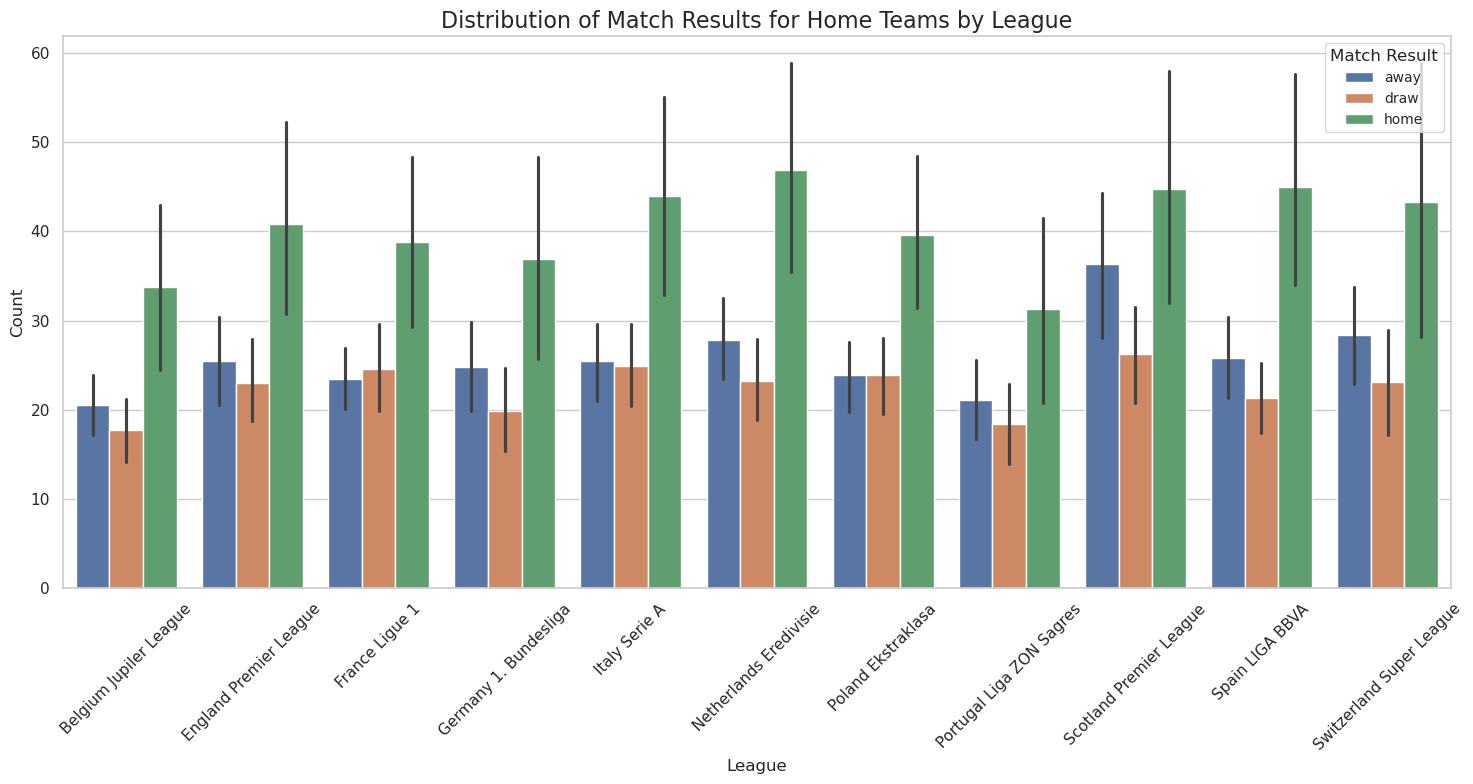

In [133]:
# Set the plot style
sns.set(style="whitegrid")

# Initialize the plot
plt.figure(figsize=(15, 8))

# Plot the data using a bar chart
sns.barplot(
    data=home_results_melted, 
    x='league_id', 
    y='count', 
    hue='result'
)

# Add plot labels and title
plt.title('Distribution of Match Results for Home Teams by League', fontsize=16)
plt.xlabel('League', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Match Result', loc='upper right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [134]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from ipywidgets import widgets, interact

# # # Example DataFrames (replace with your actual data)
# df_competition = pd.DataFrame({
#     'name_y': ['England Premier League', 'Spain La Liga', 'Italy Serie A']
# })  # Replace with your actual leagues data

# # Placeholder top_10_per_league for demonstration
# top_10_per_league = pd.DataFrame({
#     'league_id': ['England Premier League'] * 10 + ['Spain La Liga'] * 10,
#     'team_long_name': ['Team A', 'Team B', 'Team C', 'Team D', 'Team E',
#                        'Team F', 'Team G', 'Team H', 'Team I', 'Team J'] * 2,
#     'performance_score': [80, 78, 76, 74, 72, 70, 68, 66, 64, 62] * 2
# })

# # Interactive function to filter and plot data
# def plot_top_teams(selected_league):
#     # Filter top_10_per_league for the selected league
#     filtered_data = top_10_per_league[top_10_per_league['league_id'] == selected_league]

#     # Check if filtered data is not empty
#     if not filtered_data.empty:
#         # Plot the graph
#         plt.figure(figsize=(10, 6))
#         sns.barplot(data=filtered_data, x='performance_score', y='team_long_name', palette='viridis')
#         plt.title(f"Top 10 Teams in {selected_league}")
#         plt.xlabel("Performance Score")
#         plt.ylabel("Team Name")
#         plt.show()
#     else:
#         print("No data available for the selected league.")

# # Dropdown widget for selecting a league
# league_dropdown = widgets.Dropdown(
#     options=df_compitition['name_y'].unique(),
#     description='Select League:',
#     style={'description_width': 'initial'}
# )

# # Interactive widget
# interact(plot_top_teams, selected_league=league_dropdown)


In [135]:
# Function to plot a specific group of team attributes
def plot_team_attributes(team_name, attribute_group):
    # Filter data for the selected team
    team_data = df_team_combined[df_team_combined['team_long_name'] == team_name]
    if team_data.empty:
        print(f"No data available for team: {team_name}")
        return

    # Define attribute groups
    groups = {
        "Build-Up Play": [
            "buildUpPlaySpeed", "buildUpPlaySpeedClass", "buildUpPlayDribbling",
            "buildUpPlayDribblingClass", "buildUpPlayPassing", "buildUpPlayPassingClass",
            "buildUpPlayPositioningClass"
        ],
        "Chance Creation": [
            "chanceCreationPassing", "chanceCreationPassingClass",
            "chanceCreationCrossing", "chanceCreationCrossingClass",
            "chanceCreationShooting", "chanceCreationShootingClass",
            "chanceCreationPositioningClass"
        ],
        "Defense": [
            "defencePressure", "defencePressureClass", "defenceAggression",
            "defenceAggressionClass", "defenceTeamWidth", "defenceTeamWidthClass",
            "defenceDefenderLineClass"
        ],
    }

    if attribute_group not in groups:
        print(f"Invalid group: {attribute_group}")
        return

    attributes = groups[attribute_group]

    # Separate numeric and class attributes
    numeric_attributes = [attr for attr in attributes if attr in team_data.columns and team_data[attr].dtype in ["int64", "float64"]]
    class_attributes = [attr for attr in attributes if attr in team_data.columns and team_data[attr].dtype == "object"]

    # Prepare plot
    plt.figure(figsize=(10, 6))

    # Plot numeric attributes as bars
    if numeric_attributes:
        values = team_data[numeric_attributes].iloc[0]
        plt.bar(numeric_attributes, values, color='skyblue', label='Numeric Attributes')

    # Add qualitative information as text annotations
    y_pos = max(values) * 0.8 if numeric_attributes else 1  # Adjust y-position if numeric attributes exist
    for attr in class_attributes:
        class_value = team_data[attr].iloc[0]
        plt.text(
            len(numeric_attributes) / 2,  # Place in the middle of the bars
            y_pos,
            f"{attr}: {class_value}",
            fontsize=10,
            color='darkred',
            fontweight='bold',
        )
        y_pos -= max(values) * 0.2 if numeric_attributes else 0.2  # Adjust y spacing

    # Set plot title and labels
    plt.title(f"{attribute_group} for {team_name}", fontsize=14)
    plt.ylabel("Values")
    plt.xlabel("Attributes")
    plt.legend()
    plt.show()

# Ensure widget is created only once
# if 'team_group_interact_instance' not in globals():
team_names = df_team_combined['team_long_name'].dropna().unique()
groups = ["Build-Up Play", "Chance Creation", "Defense"]
team_group_interact_instance = interact(plot_team_attributes, team_name=team_names, attribute_group=groups)
# else:
#     print("Widget already created.")


interactive(children=(Dropdown(description='team_name', options=('KRC Genk', 'Beerschot AC', 'SV Zulte-Waregem…

In [136]:
df_player_combined.columns

Index(['id_x', 'player_api_id', 'player_name', 'player_fifa_api_id_x',
       'birthday', 'height', 'weight', 'id_y', 'player_fifa_api_id_y', 'date',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'season', 'physique', 'technique', 'mental', 'defense',
       'performance_score'],
      dtype='object')

Analyse des Joueurs : Quels sont les joueurs les plus performants de chaque saison ?



In [137]:
df_match = pd.read_sql(query_Match, connection)
df_match['date']=pd.to_datetime(df_match['date'] , errors='coerce')
null_count = df_match['season'].isnull().sum()
# df_match.columns[:90]

In [138]:
import xml.etree.ElementTree as ET

### extract goal data from table match
df_goal_non_nan = df_match.dropna(subset='goal')


def parse_goals_to_table(df_goal):
    
    all_goal_data = []

    for i,xml_data in enumerate(df_goal['goal']):
        
        if pd.notnull(xml_data):
            x = df_goal.index[i]
            y= df_goal['season'][x]
                        
            root = ET.fromstring(xml_data)
            
            for value in root.findall('value'):
                goal_info = {
                    'season':y,
                    'match_api_id':x,
                    'goals': value.find('stats/goals').text if value.find('stats/goals') is not None else None,
                    'shoton': value.find('stats/shoton').text if value.find('stats/shoton') is not None else None,
                    'elapsed': value.find('elapsed').text if value.find('elapsed') is not None else None,
                    'player1': value.find('player1').text if value.find('player1') is not None else None,
                    'player2': value.find('player2').text if value.find('player2') is not None else None,
                    'subtype': value.find('subtype').text if value.find('subtype') is not None else None,
                    'team': value.find('team').text if value.find('team') is not None else None,
                    'goal_type': value.find('goal_type').text if value.find('goal_type') is not None else None,
                }
                
                all_goal_data.append(goal_info)

    return pd.DataFrame(all_goal_data)


df_goal= parse_goals_to_table(df_goal_non_nan)

df_goal

,season,match_api_id,goals,shoton,elapsed,player1,player2,subtype,team,goal_type
0,2008/2009,1728,1,1,22,37799,38807,header,10261,n
1,2008/2009,1728,1,1,24,24148,24154,shot,10260,n
2,2008/2009,1729,1,1,4,26181,39297,shot,9825,n
3,2008/2009,1730,1,1,83,30853,30889,distance,8650,n
4,2008/2009,1731,1,1,4,23139,36394,shot,8654,n
...,...,...,...,...,...,...,...,...,...,...
39975,2015/2016,25947,1,1,71,37554,None,None,10192,n
39976,2015/2016,25948,1,1,58,493418,None,None,9824,n
39977,2015/2016,25948,1,1,67,197757,None,None,10243,n
39978,2015/2016,25948,1,1,69,198082,None,None,10243,n


In [139]:
df_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
### add player name inforamtion to table match 
df_match = df_match.merge(df_team_combined[['team_api_id', 'team_long_name']], 
                        left_on='home_team_api_id', 
                        right_on='team_api_id', 
                        how='left')


df_match = df_match.merge(df_team_combined[['team_api_id', 'team_long_name']], 
                        left_on='away_team_api_id', 
                        right_on='team_api_id', 
                        how='left')

df_match.rename(columns={'team_long_name_x': 'home_team'}, inplace=True)

df_match.rename(columns={'team_long_name_y': 'away_team'}, inplace=True)

df_match.drop(columns=['team_api_id_x', 'team_api_id_y' , 'away_team_api_id' , 'home_team_api_id'], inplace=True)


In [141]:
### merge table by match_api_id
goal_Res = pd.merge(df_goal[['match_api_id']] , 
                    df_match[['match_api_id' , 'home_team_goal' ,'away_team_goal' , 'home_team' , 'away_team']] , 
                    on='match_api_id' , how='right')

goal_Res

,match_api_id,home_team_goal,away_team_goal,home_team,away_team
0,492473,1,1,KRC Genk,Beerschot AC
1,492473,1,1,KRC Genk,Beerschot AC
2,492473,1,1,KRC Genk,Beerschot AC
3,492473,1,1,KRC Genk,Beerschot AC
4,492473,1,1,KRC Genk,Beerschot AC
...,...,...,...,...,...
783368,1992095,4,3,BSC Young Boys,FC Basel
783369,1992095,4,3,BSC Young Boys,FC Basel
783370,1992095,4,3,BSC Young Boys,FC Basel
783371,1992095,4,3,BSC Young Boys,FC Basel


In [142]:
### total goal in home 
top_team_home_goal=goal_Res.groupby('home_team')['home_team_goal'].sum().reset_index()
top_team_home_goal.sort_values(by='home_team_goal' , ascending=False)

,home_team,home_team_goal
205,Real Madrid CF,17712
74,FC Barcelona,17400
76,FC Bayern Munich,13542
156,Manchester City,13140
157,Manchester United,12168
...,...,...
30,Boavista FC,123
228,SV Darmstadt 98,88
87,FC Penafiel,78
77,FC Dordrecht,76


In [143]:
### total goal in away
top_team_home_goal=goal_Res.groupby('away_team')['away_team_goal'].sum().reset_index()
top_team_home_goal.sort_values(by='away_team_goal' , ascending=False)

,away_team,away_team_goal
74,FC Barcelona,12378
205,Real Madrid CF,11814
18,Arsenal,9612
76,FC Bayern Munich,9588
48,Celtic,9330
...,...,...
151,Leixões SC,90
30,Boavista FC,89
131,KAS Eupen,72
87,FC Penafiel,57


In [144]:
### reception home goal
top_team_home_res=goal_Res.groupby('away_team')['home_team_goal'].sum().reset_index()
top_team_home_res.sort_values(by='home_team_goal' , ascending=False)

,away_team,home_team_goal
108,Getafe CF,9792
118,Hannover 96,9546
229,SV Werder Bremen,9522
19,Aston Villa,9504
250,Sunderland,9360
...,...,...
151,Leixões SC,219
77,FC Dordrecht,217
87,FC Penafiel,174
131,KAS Eupen,160


In [145]:
### recpetion in away goal
top_team_away_res=goal_Res.groupby('home_team')['away_team_goal'].sum().reset_index()
top_team_away_res.sort_values(by='away_team_goal' , ascending=False)

,home_team,away_team_goal
229,SV Werder Bremen,7188
19,Aston Villa,7128
140,Kilmarnock,7074
264,VfB Stuttgart,6990
118,Hannover 96,6930
...,...,...
87,FC Penafiel,179
115,Górnik Łęczna,175
228,SV Darmstadt 98,174
173,Odra Wodzisław,164


In [146]:
### total goal scored and recieve for each team
top_team_goal = df_match.groupby('home_team')['home_team_goal'].sum().reset_index()
top_team_rec = df_match.groupby('away_team')['away_team_goal'].sum().reset_index()
top_team_goal=top_team_goal.sort_values(by='home_team_goal' , ascending=False)
top_team_rec=top_team_rec.sort_values(by='away_team_goal' , ascending=False)

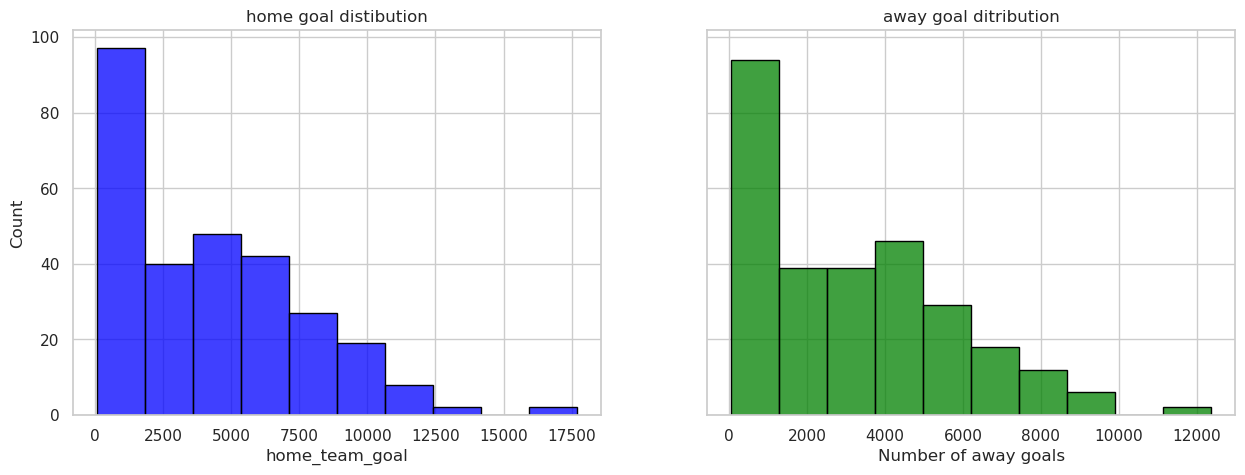

In [147]:
### visualize la distribution of goals
fig , axes = plt.subplots(1 , 2 , figsize=(15,5) , sharey=True)

sns.histplot(top_team_goal['home_team_goal'], ax=axes[0],  bins=10, color='blue', edgecolor='black')
plt.xlabel('Number of home goals')
axes[0].set_title('home goal distibution')

sns.histplot(top_team_rec['away_team_goal'], ax=axes[1], bins=10, color='green', edgecolor='black')
plt.xlabel('Number of away goals')
axes[1].set_title('away goal ditribution')

plt.show()


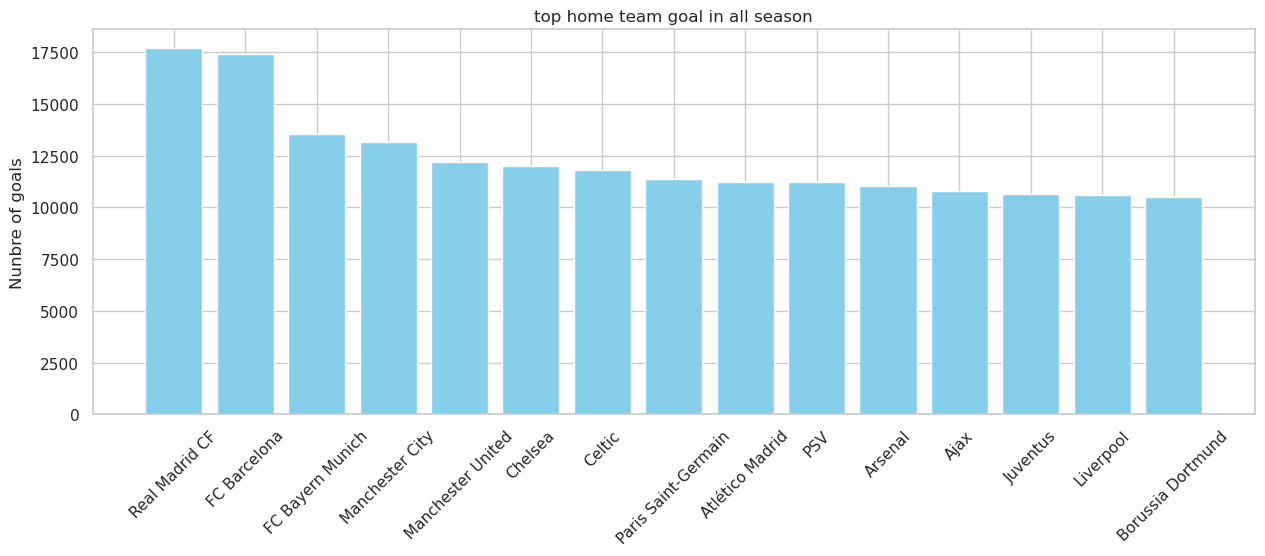

In [148]:
### visualie top team by goals 
plt.figure(figsize=(15,5))
plt.bar(top_team_goal['home_team'].head(15) , top_team_goal['home_team_goal'].head(15) , color='skyblue')
plt.title('top home team goal in all season')
plt.ylabel('Nunbre of goals')
plt.xticks(rotation=45)
plt.show()


In [149]:
#### top geal team per season
top_team_goal_sea = df_match.groupby(['home_team' , df_match['date'].dt.year])['home_team_goal'].sum().reset_index()
top_team_rec_sea= df_match.groupby(['away_team' , df_match['date'].dt.year])['away_team_goal'].sum().reset_index()
top_team_goal_sea=top_team_goal_sea.sort_values(by=['date' , 'home_team_goal'] , ascending=[True , False])
top_team_goal_sea

,home_team,date,home_team_goal
438,FC Barcelona,2008,1002
1440,SV Werder Bremen,2008,954
1290,Real Madrid CF,2008,900
975,Manchester City,2008,864
456,FC Bayern Munich,2008,786
...,...,...,...
198,Boavista FC,2016,34
1362,Royal Excel Mouscron,2016,27
701,Górnik Łęczna,2016,19
1199,Polonia Bytom,2016,18


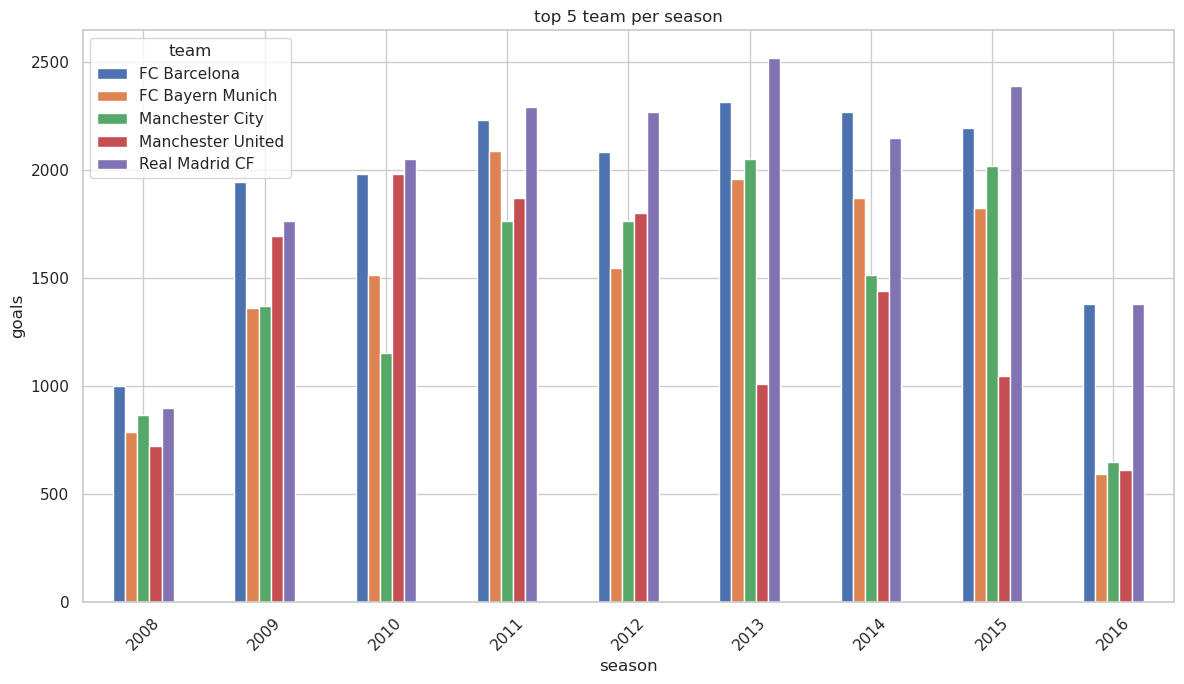

In [150]:
###top 5 team per season
top_team = top_team_goal['home_team'].head(5)

top_team_goal_sea_filtered = top_team_goal_sea[top_team_goal_sea['home_team'].isin(top_team)]
team_performance = top_team_goal_sea_filtered.groupby(['date', 'home_team'])['home_team_goal'].sum().unstack(fill_value=0)

team_performance.plot(kind='bar', figsize=(12, 7))
plt.xlabel('season')
plt.ylabel('goals')
plt.title('top 5 team per season')
plt.xticks(rotation=45)
plt.legend(title='team')

plt.tight_layout()
plt.show()


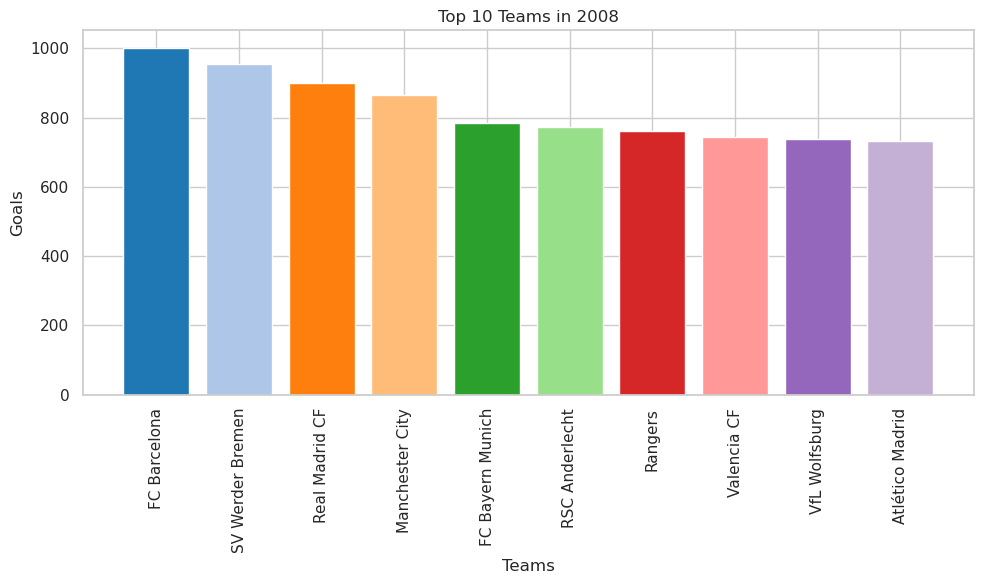

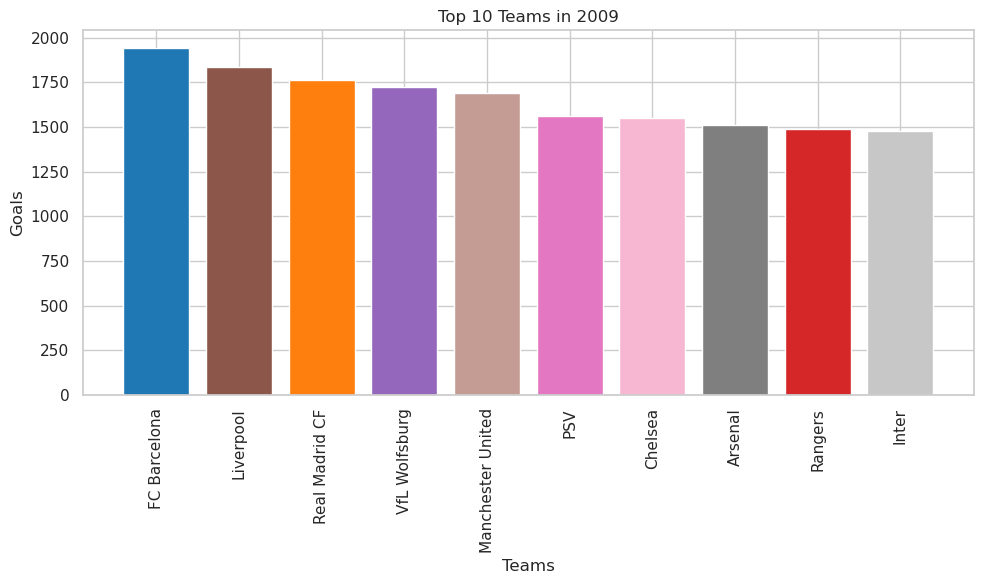

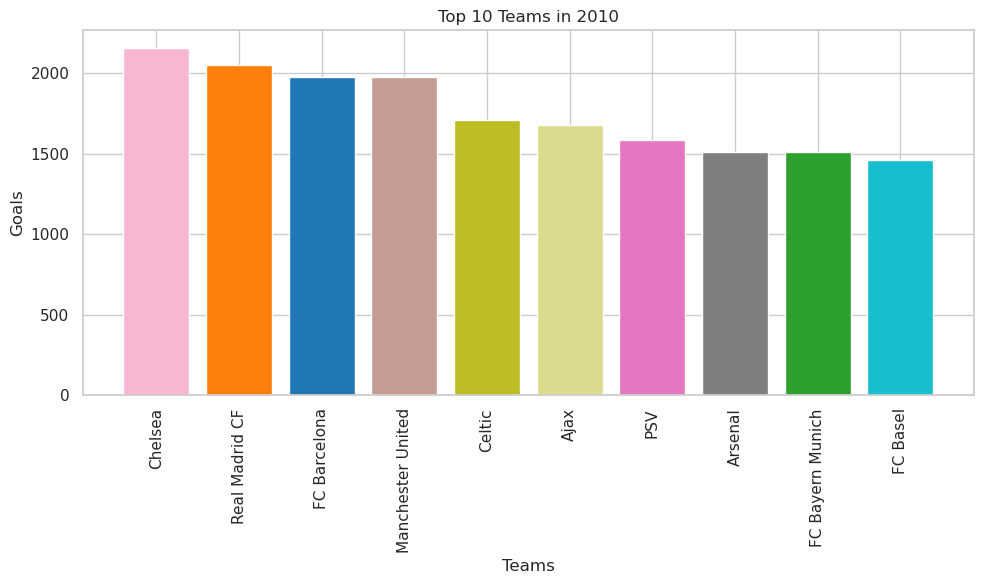

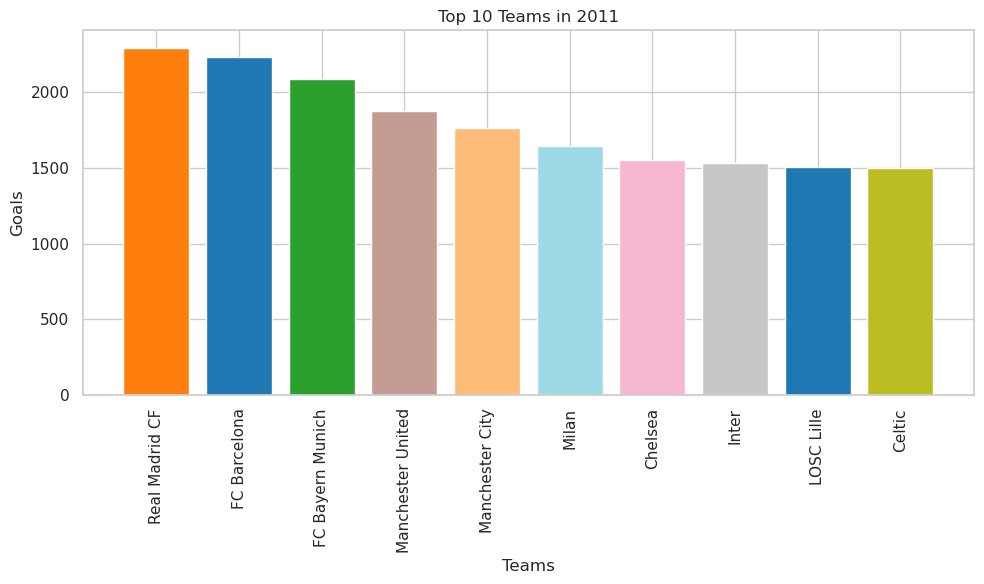

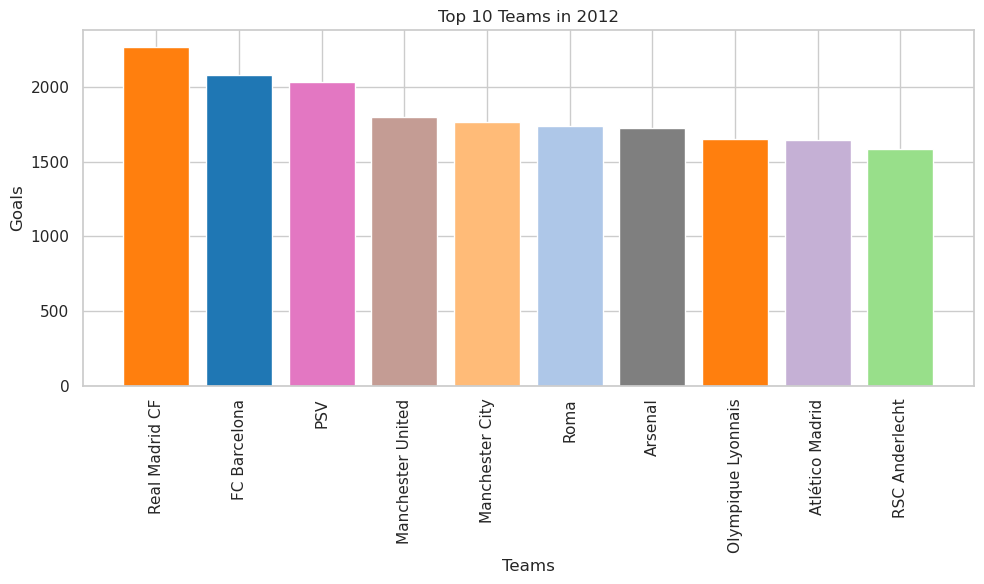

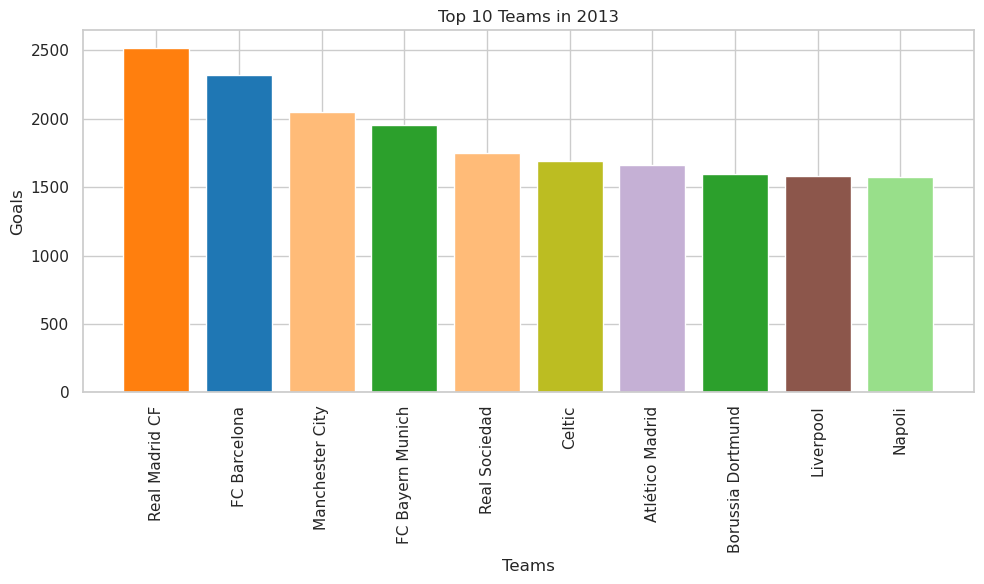

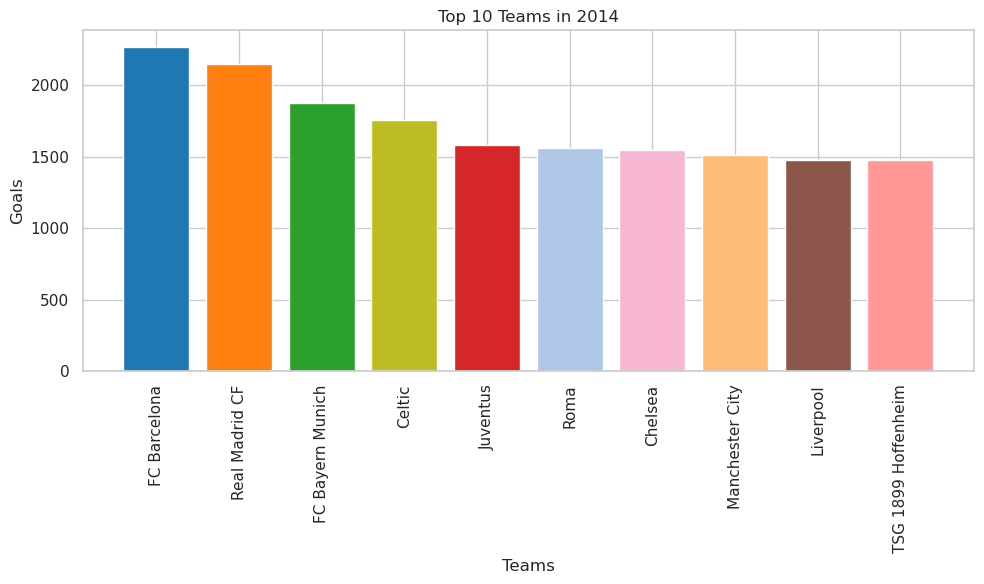

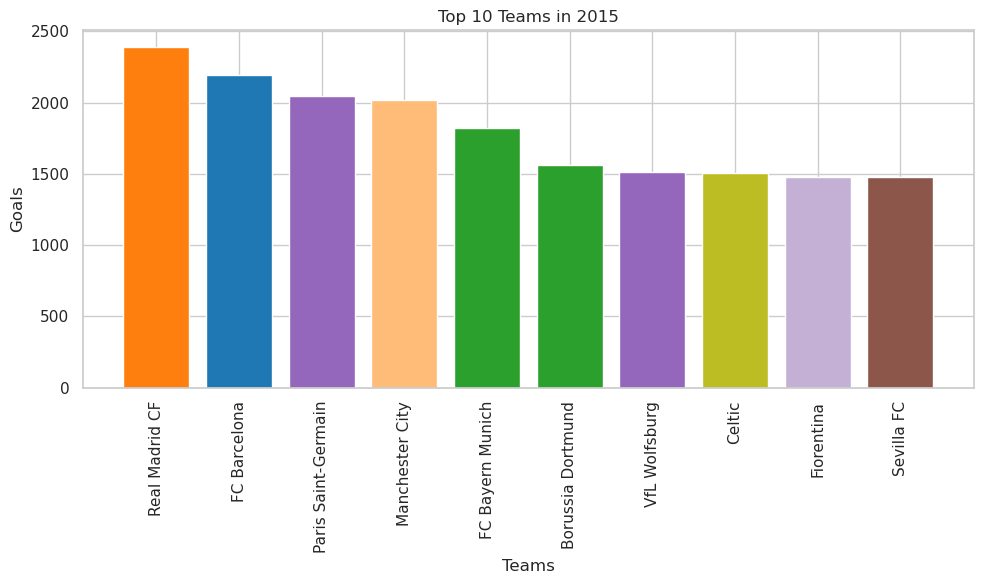

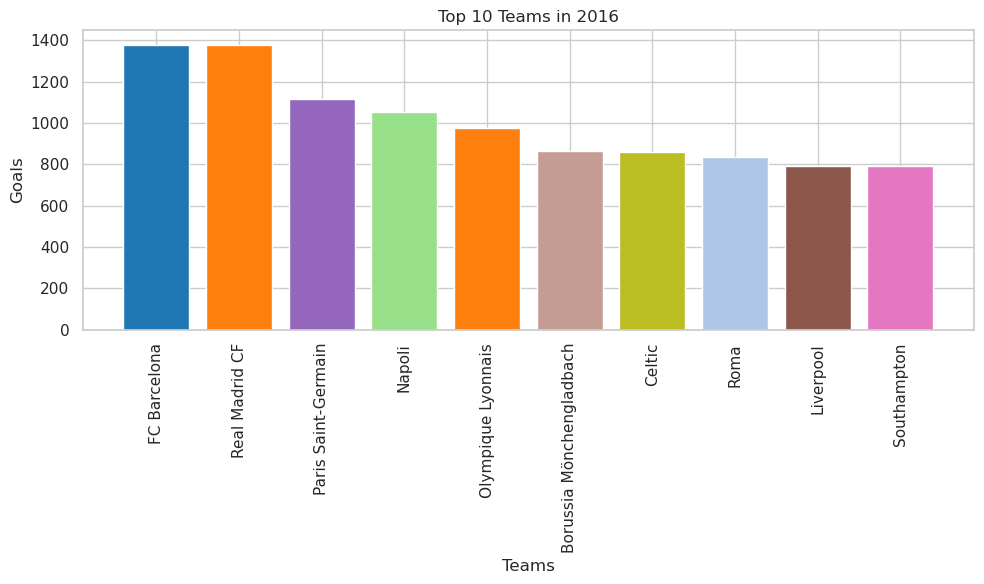

In [151]:
from matplotlib import colormaps


#### visualise top team each season by home goal
top_teams_per_year = top_team_goal_sea.groupby('date').apply(lambda x: x.nlargest(10, 'home_team_goal')).reset_index(drop=True)

unique_years = top_teams_per_year['date'].unique()
unique_teams = top_teams_per_year['home_team'].unique()

# Assign a unique color to each team
cmap = colormaps['tab20']
team_colors = {team: cmap(i % 20) for i, team in enumerate(unique_teams)}  


# fig, axes = plt.subplots(len(unique_years), 1, figsize=(12, len(unique_years) * 4))

# # Plot data for each year
# for ax, year in zip(axes, unique_years):
#     year_data = top_teams_per_year[top_teams_per_year['date'] == year]
#     colors = [team_colors[team] for team in year_data['home_team']]  # Map colors to teams
    
#     bars = ax.bar(year_data['home_team'], year_data['home_team_goal'], color=colors)
    
#     ax.set_title(f'Top 10 Teams in {year}')
#     ax.set_ylabel('Goals')
#     ax.set_xlabel('Teams')
    
    
#     ax.set_xticks(range(len(year_data['home_team'])))  
#     ax.set_xticklabels(year_data['home_team'], rotation=90) 

# plt.tight_layout()
# plt.show()


# Iterate through each unique season
for year in unique_years:
    # Filter the data for the current season
    year_data = top_teams_per_year[top_teams_per_year['date'] == year]
    
    # Map colors to teams for consistent representation
    colors = [team_colors[team] for team in year_data['home_team']]
    
    # Create a figure for the current season
    plt.figure(figsize=(10, 6))
    plt.bar(year_data['home_team'], year_data['home_team_goal'], color=colors)
    
    # Add titles and labels
    plt.title(f'Top 10 Teams in {year}')
    plt.ylabel('Goals')
    plt.xlabel('Teams')
    
    # Customize x-axis ticks
    plt.xticks(range(len(year_data['home_team'])), year_data['home_team'], rotation=90)
    
    # Adjust layout for clarity
    plt.tight_layout()
    
    # Show the plot for the current season
    plt.show()

##### Apply  Clustering ##### **************************************


In [152]:
analys_player = df_player_combined
analys_player = analys_player.groupby('player_name')[['gk_reflexes','gk_diving','standing_tackle','interceptions','finishing','positioning']].mean().reset_index()

In [153]:
analys_player[analys_player['player_name']=='Aaron Appindangoye']

,player_name,gk_reflexes,gk_diving,standing_tackle,interceptions,finishing,positioning
0,Aaron Appindangoye,7.6,5.6,66.0,52.2,43.6,44.6


In [154]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['gk_reflexes', 'gk_diving', 'standing_tackle', 'interceptions',
                       'finishing', 'positioning']

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(analys_player[columns_to_normalize])

normalized_table = pd.DataFrame(normalized_data, columns=columns_to_normalize)
normalized_table

,gk_reflexes,gk_diving,standing_tackle,interceptions,finishing,positioning
0,0.049481,0.051765,0.723898,0.537427,0.442504,0.455157
1,0.110022,0.125831,0.757534,0.603845,0.509620,0.532341
2,0.116760,0.146724,0.182367,0.479757,0.606702,0.648068
3,0.078832,0.148249,0.780026,0.646962,0.243731,0.357770
4,0.098743,0.081923,0.845030,0.825614,0.387937,0.404484
...,...,...,...,...,...,...
10843,0.153414,0.069127,0.703215,0.725564,0.453641,0.645420
10844,0.190882,0.146292,0.811369,0.771930,0.435626,0.588565
10845,0.099655,0.090026,0.304037,0.502339,0.774956,0.809417
10846,0.151604,0.113782,0.715855,0.676738,0.591025,0.650224


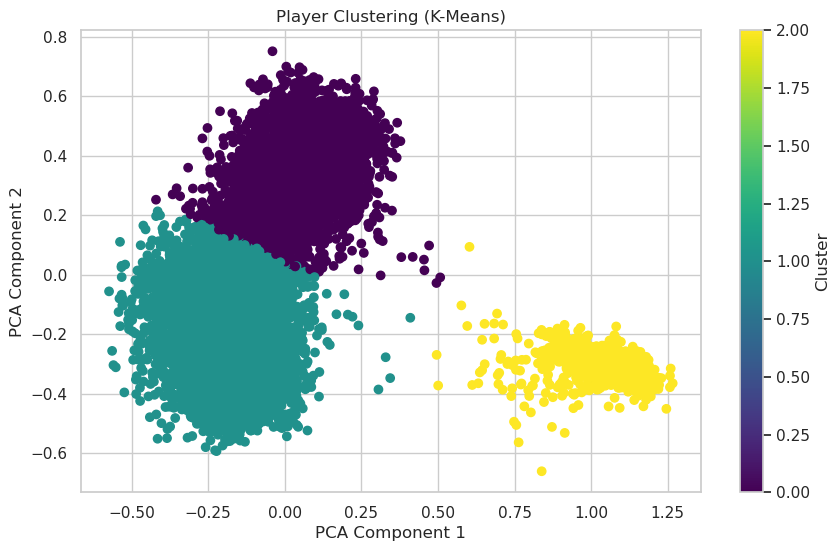

In [155]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=42)
analys_player['cluster_kmeans'] = kmeans.fit_predict(normalized_data)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=analys_player['cluster_kmeans'], cmap='viridis')
plt.title('Player Clustering (K-Means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()